## 目標
ワイン178本のデータを使用し、未知のワインの色とプロリン（アミノ酸の一種）の量の2変数から、その未知のワインが3つのブドウ品種のどれから作られたのかを識別する識別器を作成する

### 使用するデータ
 - ラベル：0, 1, 2（ブドウの品種）
 - データ：178（ワインの数）
 - 変数
    - ワインの色
    - ワインに含まれるプロリンの量

In [1]:
# ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import linear_model, metrics, preprocessing, cross_validation #機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



[Wine dataの詳細](https://archive.ics.uci.edu/ml/datasets/Wine)

In [2]:
# Wineのデータセットを読み込む--------------------------------
df_wine_all = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
df_wine = df_wine_all[[0,10,13]]
df_wine.columns = [u'class', u'color', u'proline']
pd.DataFrame(df_wine)  #この行を実行するとデータが見れる

,class,color,proline
0,1,5.640000,1065
1,1,4.380000,1050
2,1,5.680000,1185
3,1,7.800000,1480
4,1,4.320000,735
5,1,6.750000,1450
6,1,5.250000,1290
7,1,5.050000,1295
8,1,5.200000,1045
9,1,7.220000,1045


<function matplotlib.pyplot.show>

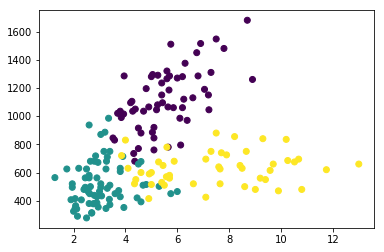

In [3]:
# プロットしてみる------------------------------------------------------
%matplotlib inline
 
x = df_wine["color"]
y = df_wine["proline"]
z = df_wine["class"]-1
plt.scatter(x,y, c=z)
plt.show

これから3つのブドウ種類を識別するための、「線形な識別平面（今回は直線）」を求める。

今回はクラスが3つあるので、マルチクラスの分類で、“one versus all” (OVA) と呼ばれ、クラス1とその他、クラス2とその他、クラス3とその他を分ける線を求めて分離する。

実行前にデータを正規化しておく。

In [4]:
# データの整形-------------------------------------------------------
X = df_wine[["color","proline"]]
sc = preprocessing.StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

線形分離のSGDを用いたClassifierを作成

In [5]:
# 機械学習で分類する---------------------------------------------------
clf_result = linear_model.SGDClassifier(loss="log", max_iter=1000, shuffle=True) #loss="hinge", loss="log"

実際の識別器がどの程度の性能を持つのかをK分割交差検証法で検討

In [6]:
# K分割交差検証（cross validation）で性能を評価する---------------------
scores = cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.8730650154798762
正解率の標準偏差 =  0.09505805489531587


K分割交差検証では視覚的にわかりにくいため、トレーニング・テストデータに分けて実行してみる
#### 本来なら
 - トレーニングデータ(手元にある事前に取得したデータ)
 - テストデータ(これから観測する未来のデータ)

となる

正答率 =  0.9444444444444444


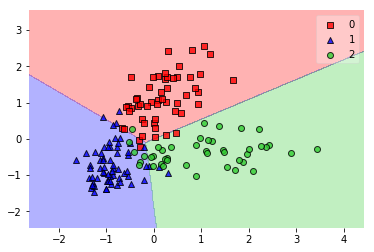

In [7]:
#解説 7：トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, train_label, test_label=cross_validation.train_test_split(X_std,z, test_size=0.1, random_state=0)
clf_result.fit(X_train, train_label)

# 正答率を求める
pre = clf_result.predict(X_test)
ac_score = metrics.accuracy_score(test_label,pre)
print("正答率 = ",ac_score)

# plotする
X_train_plot = np.vstack(X_train)
train_label_plot = np.hstack(train_label)
X_test_plot = np.vstack(X_test)
test_label_plot = np.hstack(test_label)
plot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01) #学習データをプロット

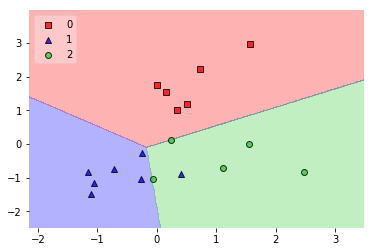

In [8]:
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2) #テストデータをプロット

In [9]:
# おまけ：識別平面の式を手に入れる--------------------------------
print(clf_result.intercept_)
print(clf_result.coef_ )  #coef[0]*x+coef[1]*y+intercept=0

[-1.50468275 -3.49192314 -1.55415115]
[[-0.30728427  4.88697474]
 [-6.82644577 -3.68800171]
 [ 3.81870114 -2.65267638]]


### SGDとは
 - [SGD:sklearn](http://scikit-learn.org/stable/modules/sgd.html#classification)
 - [SGD:sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)



### SGDの概要
求めたいのは「識別平面の係数」となるため、まずは適当な初期値の係数で識別平面を作ってみて、テストデータで識別することから始める。

最初から完璧に識別はできないため、識別できていない具合を損失関数を導入して計算する。

今回の実装の例では”hinge”というhinge関数を使用している。
（”log”にすればlog関数で損失を計算し、これはロジスティック回帰をしていることと同じになる）

求めたいの識別平面の係数でしたが、そのためにはこの損失関数を最小化すれば良いことになる。

#### 損失関数の最小化
Stochasticという名前がついている通り、確率的に計算する。
ここで示す確率的とは、全てのテストデータを一度に使わずに、データをひとつずつ使用するという意味。

テストデータひとつで識別平面の係数を変化させてしまうと、全てのデータを使用した場合に比べて変化の仕方が少しだけ違うかもしれないが、確率的にはほぼ合っているだろうという感覚。

##### 勾配変化法
Gradient Descent（勾配変化法）を利用して、ひとつのテストデータを使って損失関数を計算する。
識別平面の各係数をそれぞれ少しずつ変化させたときに、最も損失関数が小さくなる方向を求める。
（正確には損失関数の偏微分の値を解析的に求めてから、テストデータの一つを代入して方向を決定する）。

あとは、その方向に少しだけ識別平面の各係数を変化させる。

これを繰り返すことで、損失関数が最小となる場所が求まる（正確には極小）。

### SGDClassifierのloss
loss関数はdefaultで"hinge"となっているが、以下のようにデータに対してそれぞれのクラスへの識別確率を求めたい場合、"log"を指定する。

In [10]:
# 学習したデータが正規化されているため、正規化したデータを入力としなければならない
# それぞれのデータに対する各クラスに属する確率
clf_result.predict_proba([[ 0.29929955, -0.94545472],[ 2.00795098, -0.27671104]])

array([[1.97764850e-03, 1.13457959e-01, 8.84564392e-01],
       [2.92146225e-02, 9.14778042e-08, 9.70785286e-01]])